# Previsão de aprovação de empréstimos usando aprendizado de máquina

### Vamos usar algoritmos de aprendizado de máquina para prever se o perfil de um candidado é relevante ou não para a aprovação.

O conjunto de dados contém 13 recursos:

1	Empréstimo	                      Uma identidade única 
2	Gênero	                          Sexo do requerente Masculino/Feminino
3	Casado	                          Estado civil do requerente, os valores serão Sim/Não
4	Dependentes	                      Ele informa se o requerente tem dependentes ou não.
5	Educação	                        Ele nos dirá se o candidato é graduado ou não.
6	Trabalhadores por conta própria	  Isso define que o requerente é autônomo, ou seja, Sim/Não
7	Renda do Requerente	              Renda do requerente
8	Renda do Co-requerente	          Renda do co-requerente
9	Valor do empréstimo	              Valor do empréstimo (em milhares)
10	Prazo_do_valor_do_empréstimo	  Prazos do empréstimo (em meses)
11	Histórico de crédito	          Histórico de crédito do indivíduo no pagamento de suas dívidas
12	Área_de_Propriedade	            Área da propriedade, ou seja, rural/urbana/semi-urbana 
13	Status do empréstimo	          Status do empréstimo aprovado ou não, ou seja, S- Sim, N-Não 


### Importando bibliotecas e conjuntos de dados

Vamos importar as bibliotecas:

Pandas - Para carregar o Dataframe
Matplotlib - Para visualizar os recursos dos dados (gráfico)
Seaborn - Para ver a correlação entre recursos usando mapa de calor

In [1]:
import pandas as pd # carregar dataframe - estrutura de dados tabular
import numpy as np # operações matemáticas com arrays [vetores e matrizes]
import matplotlib.pyplot as plt # biblioteca de visualização de dados/gráficos
import seaborn as sns # visualização estatística de dados (gráficos avançados, mapas de calor - baseada em matplotlib)

data = pd.read_csv('LoanApprovalPrediction.csv') # lê o arquivo CSV e carrega os dados no DataFrame data do pandas
data.head(5) # imprime as 5 primeiras linhas do DataFrame

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


###  Pré-processamento e visualização de dados

In [2]:
obj = (data.dtypes == 'object') # cria uma série booleana: True para colunas categóricas (tipo object, ger. strings) e False para colunas numéricas

print("Categorical variables:", len(list(obj[obj].index))) # variáveis categóricas, ou seja, as variáveis que possuem valores não numéricos

"""

obj[obj] → filtra apenas os itens onde obj == True, ou seja, apenas as colunas categóricas.

.index → pega os nomes das colunas categóricas.

list(...) → transforma em uma lista de   nomes.

len(...) → conta quantos nomes existem nessa lista.

"""

Categorical variables: 7


'\n\nobj[obj] → filtra apenas os itens onde obj == True, ou seja, apenas as colunas categóricas.\n\n.index → pega os nomes das colunas categóricas.\n\nlist(...) → transforma em uma lista de   nomes.\n\nlen(...) → conta quantos nomes existem nessa lista.\n\n'

Como Loan_ID é completamente único e não está correlacionado com nenhuma outra coluna, vamos removê-lo usando a função . drop() .

In [3]:
# Dropping Loan_ID column
data.drop(
  ['Loan_ID'],  # remover a coluna chamada Loan_ID
  axis=1,       # axis=0 → remove linhas || axis=1 → remove colunas
  inplace=True  # Se inplace=False (padrão), retorna cópia sem a coluna, mas não alteraria data original. Com inplace=True, altera data original diretamente.
  )

Visualize todos os valores únicos em colunas usando o gráfico de barras . Isso mostrará simplesmente qual valor é dominante em nosso conjunto de dados.

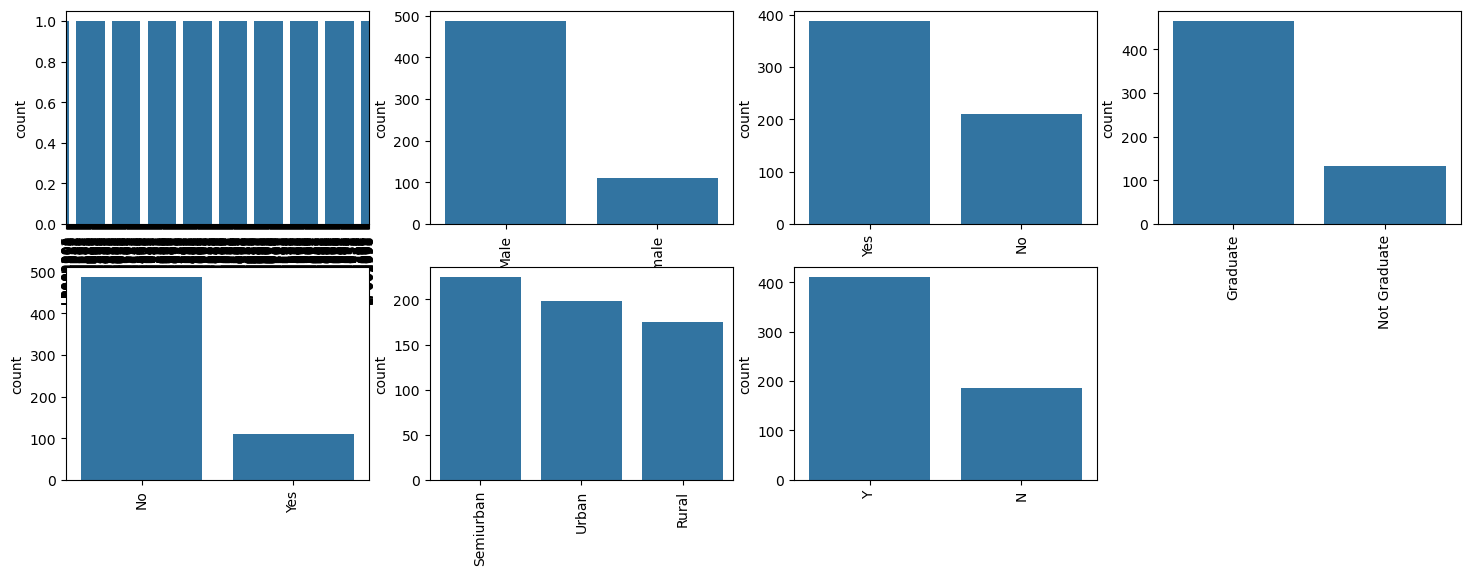

In [3]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36)) # largura, altura em polegadas
index = 1 # contador para o número do subplot

for col in object_cols:
  y = data[col].value_counts() # Conta a frequência de cada categoria na coluna atual; ex.: "Gender" possui os valores "Male" e "Female", value_counts() conta quantas vezes cada valor aparece
  plt.subplot(11,4,index) # Cria um grid de 11 linhas x 4 colunas de gráficos; index define a posição do gráfico no grid
  plt.xticks(rotation=90) # Gira os rótulos do eixo X em 90° - evita sobreposição
  # cria um gráfico de barras para mostrar quantas vezes cada categoria aparece na coluna.
  sns.barplot(
    x=list(y.index), # os nomes das categorias no eixo X
    y=y) # suas frequências, no eixo Y
  index +=1 # itera o contador do subplot

Dado que todos os valores categóricos são binários, podemos usar o Label Encoder para todas essas colunas e os valores mudarão para o tipo de dados int.

In [4]:
# import label encoder
from sklearn import preprocessing # importa o módulo preprocessing do scikit-learn, usado para pré-processamento de dados

label_encoder = preprocessing.LabelEncoder() # cria um objeto LabelEncoder, que transforma categorias em números inteiros

obj = (data.dtypes == 'object') # cria uma série booleana: True para colunas categóricas (tipo 'object'), False para as outras

for col in list(obj[obj].index): # percorre a lista de nomes das colunas que são categóricas
  data[col] = label_encoder.fit_transform(data[col]) # aplica o LabelEncoder em cada coluna e substitui os valores originais por números

Verificando as colunas de tipo de dados do objeto, vemos que não há mais nenhuma variável categorica.

In [5]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


Vamos construir o mapa de calor que representa a frequências dos valores.
O mapa de calor abaixo mostra a correlação entre o Valor do Empréstimo e a Renda do Candidato. Também mostra que o Histórico de Crédito tem um alto impacto no Status do Empréstimo.

<Axes: >

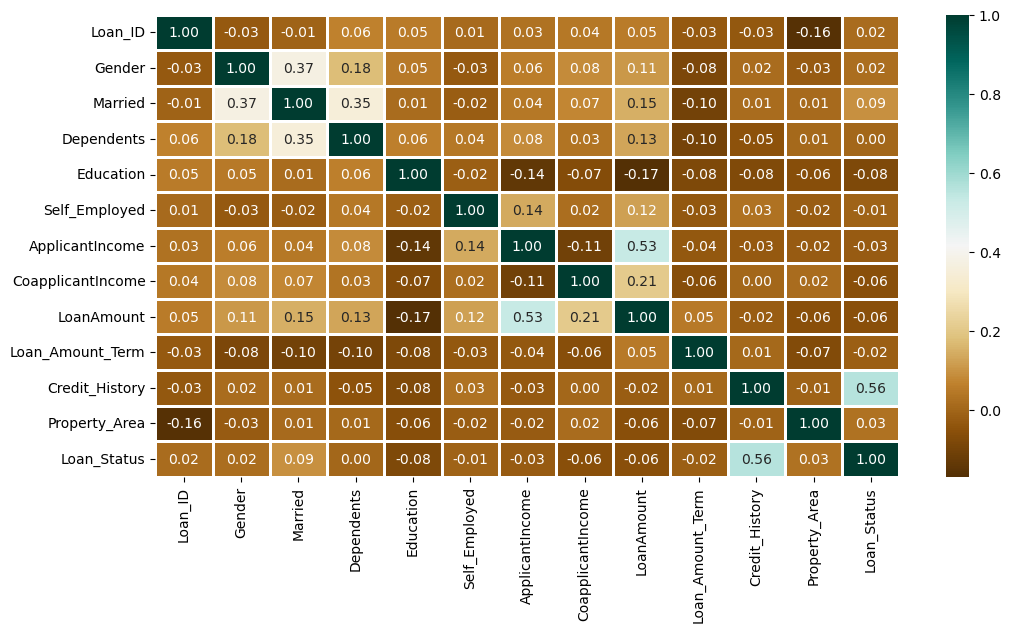

In [6]:
plt.figure(figsize=(12, 6)) # largura, altura em polegadas da nova figura


sns.heatmap( # cria um mapa de calor (heatmap) para mostrar a correlação entre as variáveis numéricas 
  data.corr(), # Calcula a matriz de correlação entre todas as variáveis numéricas (coeficiente de Pearson - +1 (relação perfeitamente positiva), 0 (sem relação linear), -1 (relação perfeitamente negativa))
  cmap="BrBG", # esquema de cores (BrBG = Brown-Blue-Green)
  fmt=".2f", # formata os números dentro do gráfico com 2 casas decimais
  linewidths=2, # coloca linhas de separação entre os quadrados do mapa, com espessura 2
  annot=True # exibe os valores numéricos da correlação dentro de cada célula
  ) 

Agora usaremos o Catplot para visualizar o gráfico do gênero e estado civil do candidato.

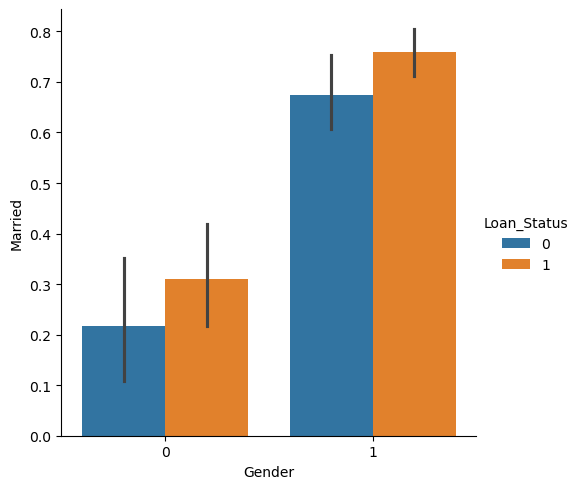

In [7]:
sns.catplot(
  x = "Gender", # variável categórica no eixo X
  y = "Married", # variável categórica no eixo Y
  hue = "Loan_Status", # diferencia as barras por categoria do status do empréstimo (cores diferentes)
  kind = "bar", # tipo do gráfico de barras
  data = data # DataFrame com os dados
)

Agora descobriremos se há algum valor ausente no conjunto de dados usando o código abaixo.

In [8]:
for col in data.columns: # percorre todas as colunas do DataFrame
  data[col] = data[col].fillna(data[col].mean()) # substitui os valores NaN pela média da coluna
  
data.isnull().sum() # verifica se ainda há valores ausentes (NaN) em cada coluna do DataFrame

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Treinamento de um modelo de ML para aprovação de empréstimo

Vamos dividir o dataset em um conjunto de treinamento e de test, sendo o conjunto de test 40% do tamanho do dataset e o conjunto de treinamento 60%.

In [9]:
from sklearn.model_selection import train_test_split # dividir o dataset em dois (ou mais) conjuntos: geralmente treino e teste

X = data.drop(['Loan_Status'], axis=1)
Y = data['Loan_Status']
X.shape, Y.shape

# treino dos atributos, teste dos atributos, rótulo do treino, rótulo do teste
# X os conjuntos, e Y para rótulos
X_train, X_test, Y_train, Y_test = train_test_split(
  X,
  Y,
  test_size=0.4, # tamanho do dataset de teste
  random_state=1 # define uma semente para o gerador de números aleatórios (reprodutibilidade)
)

# exibe o tamanho de cada subconjunto do dataset
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape
# (registros, colunas) --> X_train.shape e X_test.shape
# (registros,) --> Y_train.shape e Y_test.shape



((358, 12), (240, 12), (358,), (240,))

O problema de avaliação para aprovação ou não de um empréstimo enquadra-se na categoria "Classificação". Isso nos permite escolher o algoritmo a se trabalhar, dentro das opções de algoritmos usados para resolver problemas de classificação.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics # Biblioteca com funções de avaliação de modelos, como acurácia, precisão etc

knn = KNeighborsClassifier(n_neighbors=3) # O modelo irá considerar os 3 vizinhos mais próximos para prever a classe de uma amostra.


rfc = RandomForestClassifier(
  n_estimators=7, # Número de árvores na floresta (7 árvores de decisão)
  criterion='entropy', # Critério para medir a qualidade dos splits ("entropy" usa informação mútua)
  random_state=7 # Semente para reprodutibilidade dos resultados
)

# SVM (Support Vector Machine)
svc = SVC() # Por padrão usa kernel RBF, busca encontrar um hiperplano ótimo para separar as classes.

lc = LogisticRegression() # Modelo linear que estima a probabilidade das classes por meio da função logística (sigmóide).

# Realizando a predição sobre o conjunto de treinamento
for clf in (rfc, knn, svc, lc):
  clf.fit(X_train, Y_train) # Treina o modelo (ajusta os parâmetros com os dados de treino)
  Y_pred = clf.predict(X_train) # Faz predições usando os dados de treino
  print(
    "Acurácia do modelo", # Texto fixo
    clf.__class__.__name__, # Nome da classe do modelo (ex: 'RandomForestClassifier')
    "=",
    100 * metrics.accuracy_score(Y_train, Y_pred), "%" # Calcula a acurácia (proporção de acertos) e mostra em percentual
  )

Acurácia do modelo RandomForestClassifier = 98.04469273743017 %
Acurácia do modelo KNeighborsClassifier = 76.25698324022346 %
Acurácia do modelo SVC = 68.71508379888269 %
Acurácia do modelo LogisticRegression = 79.05027932960894 %


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Previsão no conjunto de teste

In [11]:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(
        "Acurácia do modelo",
          clf.__class__.__name__,
          "=",
          100*metrics.accuracy_score(Y_test, Y_pred)) # Calcula a acurácia (proporção de acertos) e mostra em percentual

Acurácia do modelo RandomForestClassifier = 77.08333333333334
Acurácia do modelo KNeighborsClassifier = 63.74999999999999
Acurácia do modelo SVC = 69.16666666666667
Acurácia do modelo LogisticRegression = 77.08333333333334


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
